Holt-Winters Methods
In the previous section on Exponentially Weighted Moving Averages (EWMA) we applied Simple Exponential Smoothing using just one smoothing factor  𝛼  (alpha). This failed to account for other contributing factors like trend and seasonality.

In this section we'll look at Double and Triple Exponential Smoothing with the Holt-Winters Methods.

In Double Exponential Smoothing (aka Holt's Method) we introduce a new smoothing factor  𝛽  (beta) that addresses trend:

𝑙𝑡𝑏𝑡𝑦𝑡𝑦̂ 𝑡+ℎ=(1−𝛼)𝑙𝑡−1+𝛼𝑥𝑡,=(1−𝛽)𝑏𝑡−1+𝛽(𝑙𝑡−𝑙𝑡−1)=𝑙𝑡+𝑏𝑡=𝑙𝑡+ℎ𝑏𝑡 level trend fitted model forecasting model (ℎ=# periods into the future)
 
Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With Triple Exponential Smoothing (aka the Holt-Winters Method) we introduce a smoothing factor  𝛾  (gamma) that addresses seasonality:

𝑙𝑡𝑏𝑡𝑐𝑡𝑦𝑡𝑦̂ 𝑡+𝑚=(1−𝛼)𝑙𝑡−1+𝛼𝑥𝑡,=(1−𝛽)𝑏𝑡−1+𝛽(𝑙𝑡−𝑙𝑡−1)=(1−𝛾)𝑐𝑡−𝐿+𝛾(𝑥𝑡−𝑙𝑡−1−𝑏𝑡−1)=(𝑙𝑡+𝑏𝑡)𝑐𝑡=(𝑙𝑡+𝑚𝑏𝑡)𝑐𝑡−𝐿+1+(𝑚−1)𝑚𝑜𝑑𝐿 level trend seasonal fitted model forecasting model (𝑚=# periods into the future)
 
Here  𝐿  represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use  𝐿=12 .

In general, higher values for  𝛼 ,  𝛽  and  𝛾  (values closer to 1), place more emphasis on recent data.

Related Functions:
statsmodels.tsa.holtwinters.SimpleExpSmoothing(endog)     Simple Exponential Smoothing
statsmodels.tsa.holtwinters.ExponentialSmoothing(endog)   Holt-Winters Exponential Smoothing
For Further Reading:
NIST/SEMATECH e-Handbook of Statistical Methods  What is Exponential Smoothing?
Perform standard imports and load the dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [2]:
df.dropna(inplace=True)

In [3]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.
A full list of time series offset aliases can be found here.
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [4]:
df.index.freq='MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

Simple Exponential Smoothing
A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas .ewm() method:
𝑦0𝑦𝑡=𝑥0=(1−𝛼)𝑦𝑡−1+𝛼𝑥𝑡,

NOTE: For some reason, when optimized=False is passed into .fit(), the statsmodels SimpleExpSmoothing function shifts fitted values down one row. We fix this by adding .shift(-1) after .fittedvalues

In [6]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [7]:
#model_fit = model.fit(smoothing_level=alpha,optimized=False)

In [8]:
#model_fit.fittedvalues

In [9]:
#model_fit.fittedvalues.shift(-1)

In [10]:
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor  𝛼  (alpha), Double Exponential Smoothing adds a second smoothing factor  𝛽  (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ( 0<𝛽≤1 ). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an additive adjustment. If the time series displays an exponential (curved) trend, you would use a multiplicative adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require damping that reduces the size of the trend over future periods until it reaches a flat line.

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


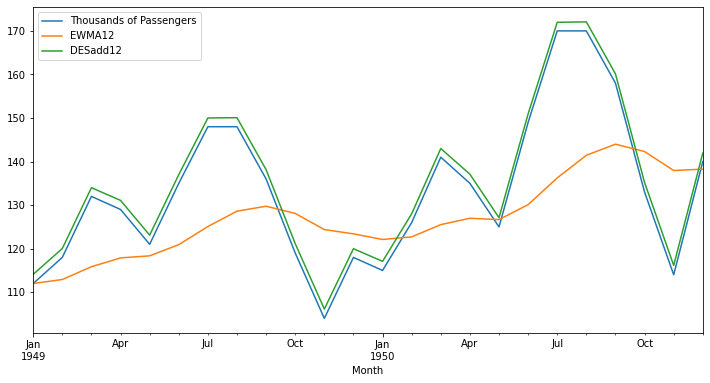

In [12]:
#df[['Thousands of Passengers','EWMA12','DESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True); # plot for specific 24 months of starting data 

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.
Let's see if using a multiplicative seasonal adjustment helps.

In [13]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


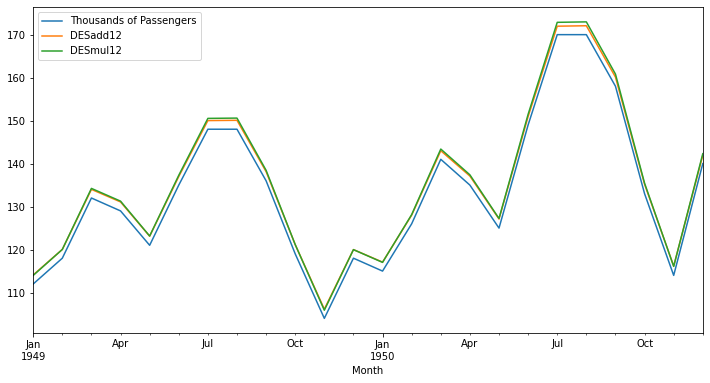

In [14]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Although minor, it does appear that a multiplicative adjustment gives better results. Note that the green line almost completely overlaps the original data.

In [15]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,112.006984
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.149251
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.693302
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.367738
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.625107


Triple Exponential Smoothing¶
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

In [16]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Pratik Patel\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,112.006984,111.592072
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.149251,118.842954
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.693302,133.333217
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.367738,127.901748
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.625107,120.980377


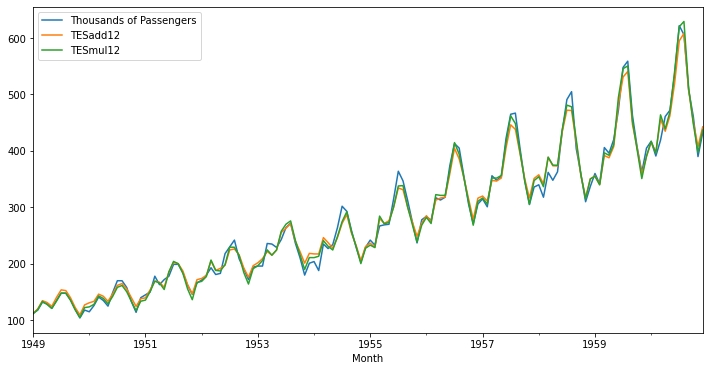

In [17]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot above, you might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing. The key here is to consider what comes next - forecasting. We'll see that having the ability to predict fluctuating seasonal patterns greatly improves our forecast.

But first, we'll work out some time series exercises before moving on to forecasting.